In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
choice = 0  #start from 0
devices = ['nfet_01v8_lvt', 'nfet_01v8', 'pfet_01v8_lvt', 'pfet_01v8']

# widths used for characterization and BSIM4 fringe cap parameters (fringe caps are not included in ngspice output)
w = np.array([5, 5, 5, 5])
cgdo_w = np.array([2.39289e-10, 2.44907e-10, 2e-11, 5.24893e-11])*1e-6

In [3]:
# read ngspice data
df_raw = pd.read_csv('./simulation/techsweep_'+devices[choice]+'.txt', sep='\s+')
par_names = df_raw.columns.to_list()
fet_name = par_names[1].split('[')[0]

# remove unwanted columns and rename for readability
df = df_raw.drop(['frequency', 'frequency.1'], axis=1)
df = df.apply(pd.to_numeric)
df.columns = df.columns.str.replace(fet_name, '')
df.columns = df.columns.str.replace(fet_name[1:], '')
df.columns = df.columns.str.replace('onoise..', 'n')
df.columns = df.columns.str.removeprefix('[')
df.columns = df.columns.str.removesuffix(']')

# round sweep vectors to easily addressable values
df['l'] = df['l'].apply(lambda x: round(x/1e-6, 3))
df['vgs'] = df['vgs'].apply(lambda x: round(x, 3))
df['vds'] = df['vds'].apply(lambda x: round(x, 3))
df['vbs'] = df['vbs'].apply(lambda x: round(x, 3))
df

,capbd,capbs,cdd,cgb,cgd,cgg,cgs,css,gds,gm,gmbs,id,l,vbs,vds,vgs,vth,n1overf,nid
0,2.820000e-15,2.820000e-15,4.190000e-16,-1.460000e-15,-3.334000e-16,1.619000e-15,1.744000e-16,-8.537000e-17,6.077000e-11,0.000000e+00,0.000000e+00,0.000000e+00,0.15,0.0,0.000,0.0,0.6197,0.000000e+00,2.389000e-16
1,2.508000e-15,2.508000e-15,3.248000e-16,-1.327000e-15,-2.635000e-16,1.448000e-15,1.426000e-16,-7.198000e-17,2.081000e-11,0.000000e+00,0.000000e+00,0.000000e+00,0.15,-0.2,0.000,0.0,0.6478,0.000000e+00,8.181000e-17
2,2.284000e-15,2.284000e-15,2.656000e-16,-1.223000e-15,-2.196000e-16,1.321000e-15,1.219000e-16,-6.206000e-17,9.059000e-12,0.000000e+00,0.000000e+00,0.000000e+00,0.15,-0.4,0.000,0.0,0.6709,0.000000e+00,3.561000e-17
3,2.774000e-15,2.820000e-15,7.575000e-17,-1.466000e-15,-5.426000e-17,1.596000e-15,-7.605000e-17,7.673000e-17,3.319000e-11,2.992000e-11,6.991000e-12,1.162000e-12,0.15,0.0,0.025,-0.0,0.6185,1.576000e-16,2.618000e-16
4,2.476000e-15,2.508000e-15,5.559000e-17,-1.330000e-15,-4.025000e-17,1.430000e-15,-5.962000e-17,5.604000e-17,1.159000e-11,1.061000e-11,1.877000e-12,4.013000e-13,0.15,-0.2,0.025,-0.0,0.6464,5.429000e-17,9.001000e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255787,1.525000e-15,2.508000e-15,9.331000e-17,3.032000e-15,-7.865000e-17,8.953000e-14,-9.248000e-14,5.475000e-14,5.449000e-06,4.495000e-04,9.444000e-05,3.357000e-04,3.00,-0.2,1.775,1.8,0.4874,2.721000e-08,4.104000e-12
255788,1.477000e-15,2.284000e-15,9.463000e-17,2.154000e-15,-8.297000e-17,8.839000e-14,-9.047000e-14,5.385000e-14,5.115000e-06,4.305000e-04,7.798000e-05,3.185000e-04,3.00,-0.4,1.775,1.8,0.5237,2.592000e-08,3.880000e-12
255789,1.571000e-15,2.820000e-15,8.398000e-17,4.368000e-15,-6.748000e-17,9.083000e-14,-9.513000e-14,5.593000e-14,5.747000e-06,4.765000e-04,1.198000e-04,3.570000e-04,3.00,-0.0,1.800,1.8,0.4469,2.878000e-08,4.443000e-12
255790,1.518000e-15,2.508000e-15,8.618000e-17,3.032000e-15,-7.262000e-17,8.953000e-14,-9.248000e-14,5.475000e-14,5.304000e-06,4.498000e-04,9.449000e-05,3.358000e-04,3.00,-0.2,1.800,1.8,0.4874,2.722000e-08,4.106000e-12


In [4]:
# sweep variable vectors
l =   np.unique(df['l'])
vgs = np.unique(df['vgs'])
vds = np.unique(df['vds'])
vsb = np.unique(-df['vbs'])

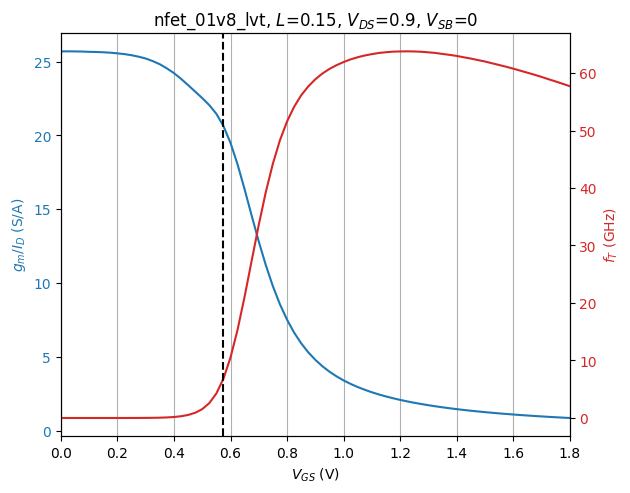

In [5]:
# plot gm/ID and fT versus gate bias
L1 = min(l); VDS1=0.9; VSB1=0
df1 = df.loc[(df['l'] == L1) & (df['vds'] == VDS1)& (df['vbs'] == -VSB1)]
gm_id1 = df1['gm'].values/df1['id'].values
cfringe = w[choice]*cgdo_w[choice]
cgg1 = df1['cgg'].values + 2*cfringe
ft1 = df1['gm'].values/cgg1/2/np.pi

fig, ax1 = plt.subplots()
ax1.grid(axis='x')
ax1.set_xlabel('$V_{GS}$ (V)')
color = 'tab:blue'
ax1.set_ylabel('$g_m/I_D$ (S/A)', color=color)
ax1.plot(vgs, gm_id1, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('$f_T$ (GHz)', color=color)
ax2.plot(vgs, ft1/1e9, color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()
plt.title(devices[choice]+', $L$='+str(L1)+', $V_{DS}$='+str(VDS1)+', $V_{SB}$='+str(VSB1))
plt.xlim(0, 1.8)
plt.axvline(x = df1['vth'].values[0], color='k', linestyle='--')
plt.show()

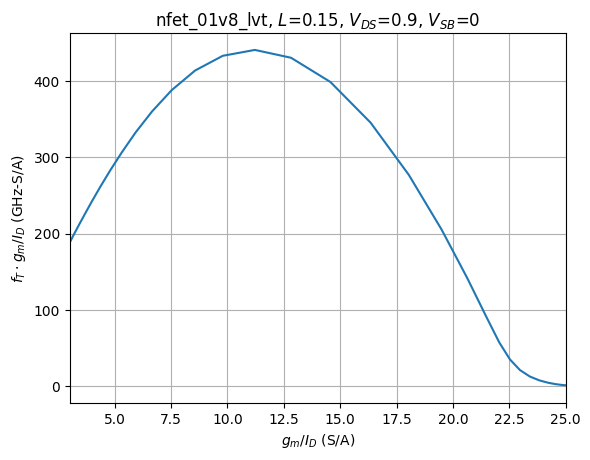

In [6]:
# plot product of gm/ID ant fT versus gm/ID
plt.plot(gm_id1, gm_id1*ft1/1e9)
plt.xlim(3, 25)
plt.xlabel('$g_m/I_D$ (S/A)')
plt.ylabel('$f_T\cdot g_m/I_D$ (GHz-S/A)')
plt.title(devices[choice]+', $L$='+str(L1)+', $V_{DS}$='+str(VDS1)+', $V_{SB}$='+str(VSB1))
plt.grid()
plt.show()

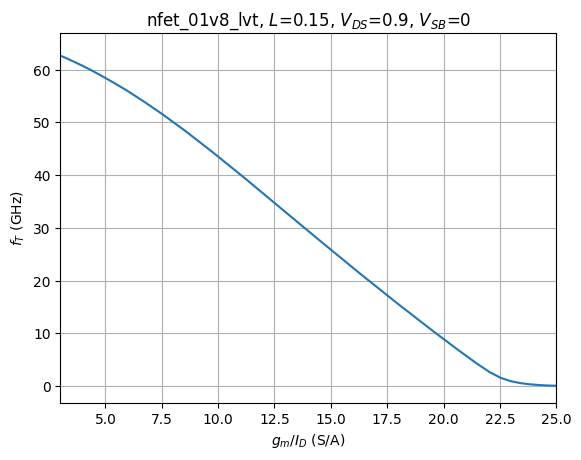

In [7]:
# plot fT versus gm/ID
plt.plot(gm_id1, ft1/1e9)
plt.xlim(3, 25)
plt.xlabel('$g_m/I_D$ (S/A)')
plt.ylabel('$f_T$ (GHz)')
plt.title(devices[choice]+', $L$='+str(L1)+', $V_{DS}$='+str(VDS1)+', $V_{SB}$='+str(VSB1))
plt.grid()
plt.show()

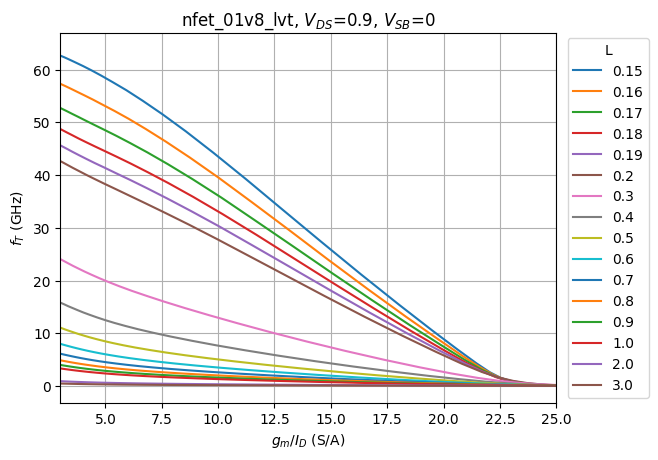

In [8]:
# plot fT versus gm/ID for all L
VDS2=0.9; VSB2=0
df2 = df.loc[ (df['vds'] == VDS2) & (df['vbs'] == -VSB2)]
df2
gm_id2 = df2['gm'].values/df2['id'].values
gm_id2 = np.reshape(gm_id2, (len(vgs), -1), order='F')
ft2 = df2['gm'].values/(df2['cgg'].values+2*cfringe)/2/np.pi
ft2 = np.reshape(ft2, (len(vgs), -1), order='F')

fig, ax = plt.subplots()
ax.plot(gm_id2, ft2/1e9)
ax.legend(loc='center right', bbox_to_anchor=(1.2, 0.5), title='L', labels=l.tolist())
plt.xlim(3, 25)
plt.xlabel('$g_m/I_D$ (S/A)')
plt.ylabel('$f_T$ (GHz)')
plt.title(devices[choice]+', $V_{DS}$='+str(VDS1)+', $V_{SB}$='+str(VSB1))
plt.grid()
plt.show()

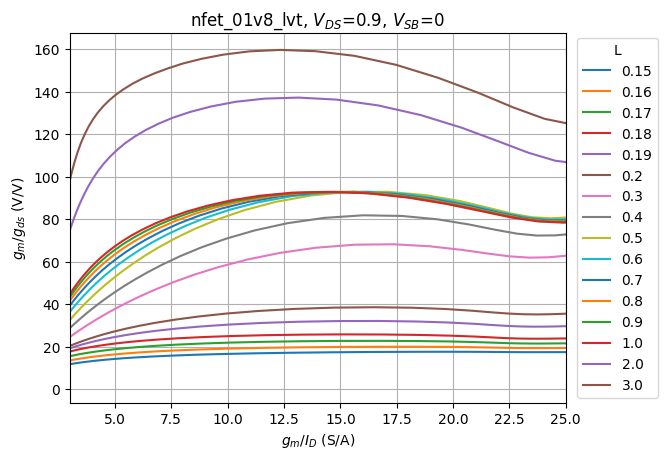

In [9]:
# plot gm/gds versus gm/ID for all L
gm_gds2 = df2['gm'].values/df2['gds'].values
gm_gds2 = np.reshape(gm_gds2, (len(vgs), -1), order='F')

fig, ax = plt.subplots()
ax.plot(gm_id2, gm_gds2)
ax.legend(loc='center right', bbox_to_anchor=(1.2, 0.5), title='L', labels=l.tolist())
plt.xlim(3, 25)
plt.xlabel('$g_m/I_D$ (S/A)')
plt.ylabel('$g_m/g_{ds}$ (V/V)')
plt.title(devices[choice]+', $V_{DS}$='+str(VDS1)+', $V_{SB}$='+str(VSB1))
plt.grid()
plt.show()

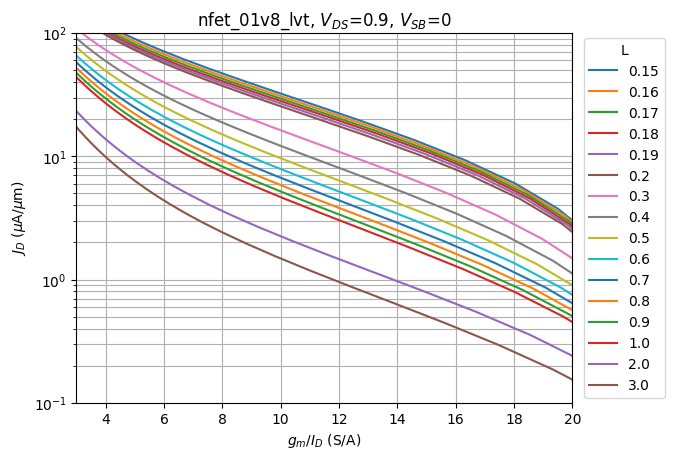

In [10]:
# plot jd versus gm/ID for all L
jd2 = df2['id'].values/w[choice]/1e-6
jd2 = np.reshape(jd2, (len(vgs), -1), order='F')

fig, ax = plt.subplots()
ax.semilogy(gm_id2, jd2)
ax.legend(loc='center right', bbox_to_anchor=(1.2, 0.5), title='L', labels=l.tolist())
plt.xlim(3, 20)
plt.ylim(1e-1, 1e2)
plt.xlabel('$g_m/I_D$ (S/A)')
plt.ylabel('$J_D$ ($\mu$A/$\mu$m)')
plt.grid(which='minor')
plt.grid(which='major')
plt.title(devices[choice]+', $V_{DS}$='+str(VDS1)+', $V_{SB}$='+str(VSB1))
plt.show()

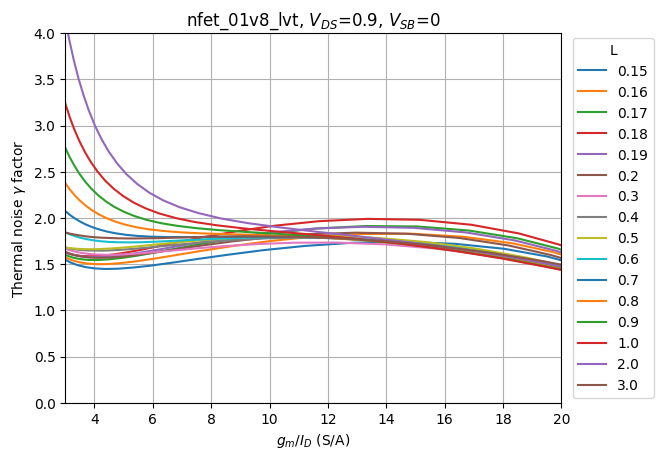

In [11]:
# plot gamma versus gm/ID for all L
gamma = df2['nid'].values**2 / df2['gm'].values/4/300/1.38e-23
gamma = np.reshape(gamma, (len(vgs), -1), order='F')

fig, ax = plt.subplots()
ax.plot(gm_id2, gamma)
ax.legend(loc='center right', bbox_to_anchor=(1.2, 0.5), title='L', labels=l.tolist())
plt.xlim(3, 20)
plt.ylim(0, 4)
plt.xlabel('$g_m/I_D$ (S/A)')
plt.ylabel('Thermal noise $\gamma$ factor')
plt.grid(which='minor')
plt.grid(which='major')
plt.title(devices[choice]+', $V_{DS}$='+str(VDS1)+', $V_{SB}$='+str(VSB1))
plt.show()

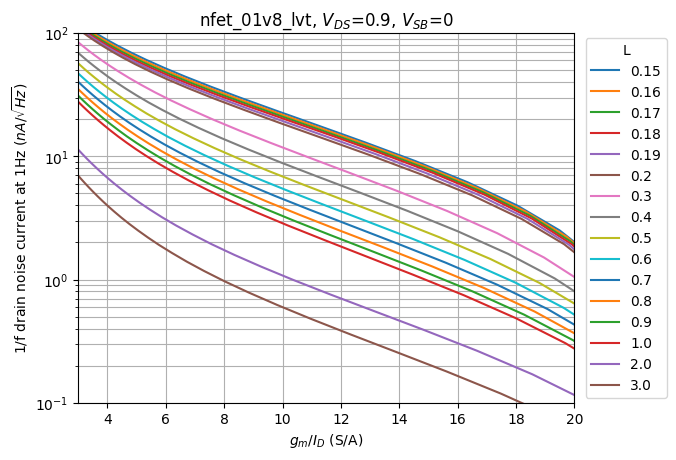

In [12]:
# plot flicker noise drain current at 1Hz versus gm/ID for all L
n1overf = df2['n1overf'].values
n1overf = np.reshape(n1overf, (len(vgs), -1), order='F')

fig, ax = plt.subplots()
ax.semilogy(gm_id2, n1overf/1e-9)
ax.legend(loc='center right', bbox_to_anchor=(1.2, 0.5), title='L', labels=l.tolist())
plt.xlim(3, 20)
plt.ylim(0.1, 100)
plt.xlabel('$g_m/I_D$ (S/A)')
plt.ylabel('1/f drain noise current at 1Hz ($nA/ \sqrt{Hz}$)')
plt.grid(which='minor')
plt.grid(which='major')
plt.title(devices[choice]+', $V_{DS}$='+str(VDS1)+', $V_{SB}$='+str(VSB1))
plt.show()

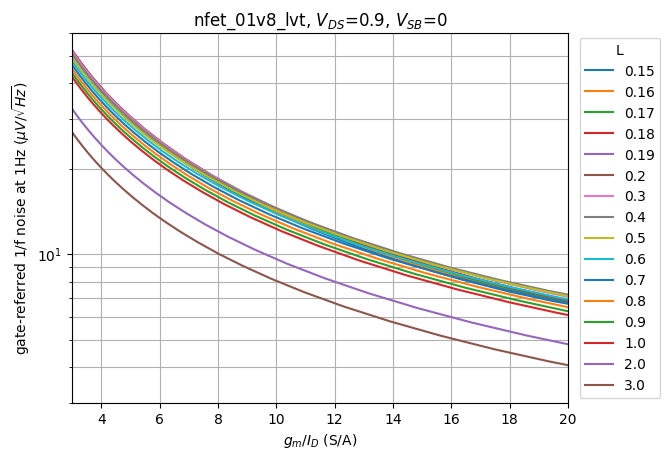

In [13]:
# plot gate-referred 1/f noise at 1Hz versus gm/ID for all L
n1overf_gate = df2['n1overf'].values / df2['gm'].values
n1overf_gate = np.reshape(n1overf_gate, (len(vgs), -1), order='F')

fig, ax = plt.subplots()
ax.semilogy(gm_id2, n1overf_gate/1e-6)
ax.legend(loc='center right', bbox_to_anchor=(1.2, 0.5), title='L', labels=l.tolist())
plt.xlim(3, 20)
plt.ylim(3, 60)
plt.xlabel('$g_m/I_D$ (S/A)')
plt.ylabel('gate-referred 1/f noise at 1Hz ($\mu V/ \sqrt{Hz}$)')
plt.grid(which='minor')
plt.grid(which='major')
plt.title(devices[choice]+', $V_{DS}$='+str(VDS1)+', $V_{SB}$='+str(VSB1))
plt.show()